Epoch [100/1000], Loss: 0.8920
Epoch [200/1000], Loss: 0.4951
Epoch [300/1000], Loss: 0.3484
Epoch [400/1000], Loss: 0.2942
Epoch [500/1000], Loss: 0.2741
Epoch [600/1000], Loss: 0.2667
Epoch [700/1000], Loss: 0.2640
Epoch [800/1000], Loss: 0.2630
Epoch [900/1000], Loss: 0.2626
Epoch [1000/1000], Loss: 0.2625


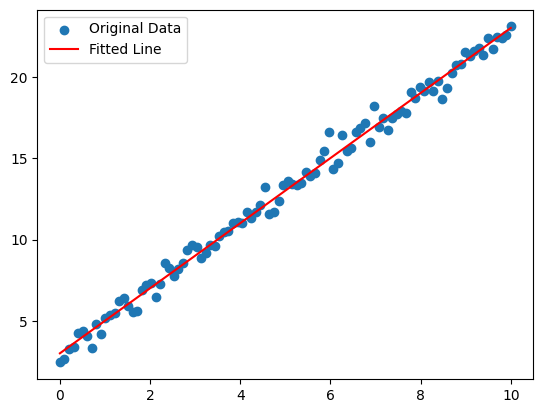

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# Generate linear data
torch.manual_seed(0)
x = torch.linspace(0, 10, 100).reshape(-1, 1)  # Input (features)
y = 2 * x + 3 + torch.randn(100, 1) * 0.5     # Output (target) with some noise


class LinearNN(nn.Module):
    def __init__(self):
        super(LinearNN, self).__init__()
        self.linear = nn.Linear(1, 1)  # One input and one output

    def forward(self, x):
        return self.linear(x)

# Initialize the model, loss function, and optimizer
model = LinearNN()
criterion = nn.MSELoss()  # Mean Squared Error Loss
optimizer = optim.SGD(model.parameters(), lr=0.01)  # Stochastic Gradient Descent

# Train the model
epochs = 1000
for epoch in range(epochs):
    # Forward pass
    predictions = model(x)
    loss = criterion(predictions, y)


    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Print loss every 100 epochs
    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch + 1}/{epochs}], Loss: {loss.item():.4f}')

# Visualize the results
with torch.no_grad():
    predicted = model(x)

plt.scatter(x, y, label='Original Data')
plt.plot(x, predicted, color='red', label='Fitted Line')
plt.legend()
plt.show()


single neuron with two layers classification


In [ ]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

# Load the dataset
iris = load_iris()
X = iris.data
y = iris.target

# One-hot encoding for classification
y_encoded = to_categorical(y)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Define the neural network
model = Sequential()
model.add(Dense(5, input_dim=X.shape[1], activation='relu'))  # Hidden layer with 5 neurons
model.add(Dense(3, activation='softmax'))  # Output layer (3 classes for Iris species)

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=100, verbose=0)

# Evaluate the model
y_pred = np.argmax(model.predict(X_test), axis=-1)
y_true = np.argmax(y_test, axis=-1)

# Accuracy score
accuracy = accuracy_score(y_true, y_pred)
print(f"Classification Accuracy: {accuracy}")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
Classification Accuracy: 0.6333333333333333


single neuron with two layers regession

In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Sample data (inputs and outputs)
X = np.array([[1], [2], [3], [4], [5]])  # Input features
y = np.array([1, 2, 3, 4, 5])            # Output labels

# Define the model
model = Sequential()

# Add a hidden layer with 5 neurons and ReLU activation
model.add(Dense(5, input_dim=1, activation='relu'))

# Output layer with 1 neuron (for regression)
model.add(Dense(1))

# Compile the model with Mean Squared Error loss function and Adam optimizer
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X, y, epochs=100, verbose=0)

# Make predictions
predictions = model.predict(X)
print(predictions)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
[[0.8834352]
 [1.517029 ]
 [2.1306424]
 [2.7363908]
 [3.342139 ]]


single neuron with one layer linear data


In [ ]:
import numpy as np

class Neuron:
    def __init__(self, input_size, learning_rate=0.01):
        # Initialize weights and bias
        self.weights = np.random.randn(input_size)
        self.bias = np.random.randn()
        self.learning_rate = learning_rate

    def activation(self, x):
        # Linear activation function
        return x

    def activation_derivative(self, x):
        # Derivative of linear activation function (constant 1)
        return 1

    def forward(self, inputs):
        # Calculate weighted sum plus bias
        self.inputs = inputs
        self.z = np.dot(inputs, self.weights) + self.bias
        # Apply linear activation function
        self.output = self.activation(self.z)
        return self.output

    def backward(self, error):
        # Calculate gradient
        d_output = error * self.activation_derivative(self.output)
        d_weights = np.dot(self.inputs.T, d_output)
        d_bias = np.sum(d_output)

        # Update weights and bias
        self.weights -= self.learning_rate * d_weights
        self.bias -= self.learning_rate * d_bias

    def train(self, inputs, target):
        # Forward pass
        output = self.forward(inputs)
        # Calculate error
        error = target - output
        # Backward pass
        self.backward(error)
        return error

# Example usage
neuron = Neuron(3)
inputs = np.array([[0.5, -0.2, 0.1]])
target = np.array([1])

# Training loop
for _ in range(1000):
    error = neuron.train(inputs, target)

print("Final output:", neuron.forward(inputs))


Final output: [-709899.81530455]


single neuron on non linear data


In [ ]:
import numpy as np

class Neuron:
    def __init__(self, input_size, learning_rate=0.01):
        # Initialize weights and bias
        self.weights = np.random.randn(input_size)
        self.bias = np.random.randn()
        self.learning_rate = learning_rate

    def activation(self, x):
        # Sigmoid activation function for non-linear data
        return 1 / (1 + np.exp(-x))

    def activation_derivative(self, x):
        # Derivative of sigmoid
        return x * (1 - x)

    def forward(self, inputs):
        # Calculate weighted sum plus bias
        self.inputs = inputs
        self.z = np.dot(inputs, self.weights) + self.bias
        # Apply activation function
        self.output = self.activation(self.z)
        return self.output

    def backward(self, error):
        # Calculate gradient
        d_output = error * self.activation_derivative(self.output)
        d_weights = np.dot(self.inputs.T, d_output)
        d_bias = np.sum(d_output)

        # Update weights and bias
        self.weights -= self.learning_rate * d_weights
        self.bias -= self.learning_rate * d_bias

    def train(self, inputs, target):
        # Forward pass
        output = self.forward(inputs)
        # Calculate error
        error = target - output
        # Backward pass
        self.backward(error)
        return error

# Example usage
neuron = Neuron(3)
inputs = np.array([[0.5, -0.2, 0.1]])
target = np.array([1])

# Training loop
for _ in range(1000):
    error = neuron.train(inputs, target)

print("Final output:", neuron.forward(inputs))


Final output: [0.20543921]


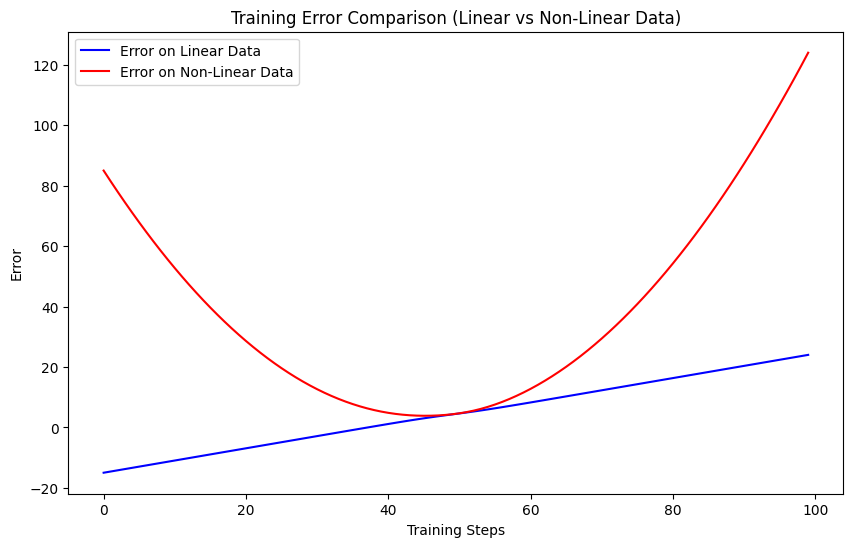

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generate Linear Data
x_linear = np.linspace(-10, 10, 100)
y_linear = 2 * x_linear + 5  # Linear relationship

# Generate Non-Linear Data
y_non_linear = x_linear**2 + 2 * x_linear + 5  # Quadratic relationship

# Training Loop for Linear Model (Sigmoid Activation)
neuron = Neuron(1)  # 1 input feature
error_linear = []
error_non_linear = []

# Training on Linear Data
for x_value, y_value in zip(x_linear, y_linear):
    inputs = np.array([[x_value]])
    target = np.array([y_value])
    error_linear.append(neuron.train(inputs, target))

# Training on Non-Linear Data
for x_value, y_value in zip(x_linear, y_non_linear):
    inputs = np.array([[x_value]])
    target = np.array([y_value])
    error_non_linear.append(neuron.train(inputs, target))

# Plotting Error Curves
plt.figure(figsize=(10, 6))
plt.plot(error_linear, label="Error on Linear Data", color='blue')
plt.plot(error_non_linear, label="Error on Non-Linear Data", color='red')
plt.legend()
plt.xlabel('Training Steps')
plt.ylabel('Error')
plt.title('Training Error Comparison (Linear vs Non-Linear Data)')
plt.show()


In [ ]:
!pip install nnfs


my code accuarcay,precison,recall,f1-score

In [ ]:
import numpy as np
import nnfs
from nnfs.datasets import spiral_data
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

nnfs.init()

# Define classes
class Layer_Dense:
    def __init__(self, n_inputs, n_neurons):
        self.weights = 0.01 * np.random.randn(n_inputs, n_neurons)
        self.biases = np.zeros((1, n_neurons))

    def forward(self, inputs):
        self.inputs = inputs
        self.output = np.dot(inputs, self.weights) + self.biases

    def backward(self, dvalues):
        self.dweights = np.dot(self.inputs.T, dvalues)
        self.dbiases = np.sum(dvalues, axis=0, keepdims=True)
        self.dinputs = np.dot(dvalues, self.weights.T)

class Activation_ReLU:
    def forward(self, inputs):
        self.inputs = inputs
        self.output = np.maximum(0, inputs)

    def backward(self, dvalues):
        self.dinputs = dvalues.copy()
        self.dinputs[self.inputs <= 0] = 0

class Activation_Softmax:
    def forward(self, inputs):
        exp_values = np.exp(inputs - np.max(inputs, axis=1, keepdims=True))
        self.output = exp_values / np.sum(exp_values, axis=1, keepdims=True)

class Loss:
    def calculate(self, output, y):
        sample_losses = self.forward(output, y)
        return np.mean(sample_losses)

class Loss_CategoricalCrossentropy(Loss):
    def forward(self, y_pred, y_true):
        samples = len(y_pred)
        y_pred_clipped = np.clip(y_pred, 1e-7, 1 - 1e-7)

        if len(y_true.shape) == 1:
            correct_confidences = y_pred_clipped[range(samples), y_true]
        elif len(y_true.shape) == 2:
            correct_confidences = np.sum(y_pred_clipped * y_true, axis=1)

        negative_log_likelihoods = -np.log(correct_confidences)
        return negative_log_likelihoods

    def backward(self, dvalues, y_true):
        samples = len(dvalues)
        labels = len(dvalues[0])

        if len(y_true.shape) == 1:
            y_true = np.eye(labels)[y_true]

        self.dinputs = -y_true / dvalues
        self.dinputs = self.dinputs / samples

class Activation_Softmax_Loss_CategoricalCrossentropy:
    def __init__(self):
        self.activation = Activation_Softmax()
        self.loss = Loss_CategoricalCrossentropy()

    def forward(self, inputs, y_true):
        self.activation.forward(inputs)
        self.output = self.activation.output
        return self.loss.calculate(self.output, y_true)

    def backward(self, dvalues, y_true):
        samples = len(dvalues)
        if len(y_true.shape) == 2:
            y_true = np.argmax(y_true, axis=1)
        self.dinputs = dvalues.copy()
        self.dinputs[range(samples), y_true] -= 1
        self.dinputs = self.dinputs / samples

# Optimizer
class Optimizer_Adam:
    def __init__(self, learning_rate=0.001, decay=0., epsilon=1e-7, beta_1=0.9, beta_2=0.999):
        self.learning_rate = learning_rate
        self.current_learning_rate = learning_rate
        self.decay = decay
        self.iterations = 0
        self.epsilon = epsilon
        self.beta_1 = beta_1
        self.beta_2 = beta_2

    def pre_update_params(self):
        if self.decay:
            self.current_learning_rate = self.learning_rate * (1. / (1. + self.decay * self.iterations))

    def update_params(self, layer):
        if not hasattr(layer, 'weight_cache'):
            layer.weight_momentums = np.zeros_like(layer.weights)
            layer.weight_cache = np.zeros_like(layer.weights)
            layer.bias_momentums = np.zeros_like(layer.biases)
            layer.bias_cache = np.zeros_like(layer.biases)

        layer.weight_momentums = self.beta_1 * layer.weight_momentums + (1 - self.beta_1) * layer.dweights
        layer.bias_momentums = self.beta_1 * layer.bias_momentums + (1 - self.beta_1) * layer.dbiases

        weight_momentums_corrected = layer.weight_momentums / (1 - self.beta_1 ** (self.iterations + 1))
        bias_momentums_corrected = layer.bias_momentums / (1 - self.beta_1 ** (self.iterations + 1))

        layer.weight_cache = self.beta_2 * layer.weight_cache + (1 - self.beta_2) * layer.dweights**2
        layer.bias_cache = self.beta_2 * layer.bias_cache + (1 - self.beta_2) * layer.dbiases**2

        weight_cache_corrected = layer.weight_cache / (1 - self.beta_2 ** (self.iterations + 1))
        bias_cache_corrected = layer.bias_cache / (1 - self.beta_2 ** (self.iterations + 1))

        layer.weights += -self.current_learning_rate * weight_momentums_corrected / (np.sqrt(weight_cache_corrected) + self.epsilon)
        layer.biases += -self.current_learning_rate * bias_momentums_corrected / (np.sqrt(bias_cache_corrected) + self.epsilon)

    def post_update_params(self):
        self.iterations += 1

# Create dataset
X, y = spiral_data(samples=100, classes=3)

# Create Dense layers
dense1 = Layer_Dense(2, 64)
activation1 = Activation_ReLU()
dense2 = Layer_Dense(64, 3)
loss_activation = Activation_Softmax_Loss_CategoricalCrossentropy()
optimizer = Optimizer_Adam(learning_rate=0.02, decay=1e-5)

# Training loop
for epoch in range(10001):
    dense1.forward(X)
    activation1.forward(dense1.output)
    dense2.forward(activation1.output)
    loss = loss_activation.forward(dense2.output, y)

    # Predictions
    predictions = np.argmax(loss_activation.output, axis=1)

    # Compute metrics
    acc = accuracy_score(y, predictions)
    f1 = f1_score(y, predictions, average='weighted')
    precision = precision_score(y, predictions, average='weighted', zero_division=1)
    recall = recall_score(y, predictions, average='weighted', zero_division=1)

    if not epoch % 100:
        print(f'Epoch: {epoch}, Acc: {acc:.3f}, Loss: {loss:.3f}, F1: {f1:.3f}, Precision: {precision:.3f}, Recall: {recall:.3f}, LR: {optimizer.current_learning_rate}')

    # Backpropagation
    loss_activation.backward(loss_activation.output, y)
    dense2.backward(loss_activation.dinputs)
    activation1.backward(dense2.dinputs)
    dense1.backward(activation1.dinputs)

    # Update parameters
    optimizer.pre_update_params()
    optimizer.update_params(dense1)
    optimizer.update_params(dense2)
    optimizer.post_update_params()


Epoch: 0, Acc: 0.360, Loss: 1.099, F1: 0.284, Precision: 0.353, Recall: 0.360, LR: 0.02
Epoch: 100, Acc: 0.673, Loss: 0.769, F1: 0.669, Precision: 0.669, Recall: 0.673, LR: 0.01998021958261321
Epoch: 200, Acc: 0.813, Loss: 0.552, F1: 0.812, Precision: 0.812, Recall: 0.813, LR: 0.019960279044701046
Epoch: 300, Acc: 0.840, Loss: 0.445, F1: 0.840, Precision: 0.843, Recall: 0.840, LR: 0.019940378268975763
Epoch: 400, Acc: 0.863, Loss: 0.380, F1: 0.863, Precision: 0.865, Recall: 0.863, LR: 0.01992051713662487
Epoch: 500, Acc: 0.873, Loss: 0.336, F1: 0.874, Precision: 0.874, Recall: 0.873, LR: 0.01990069552930875
Epoch: 600, Acc: 0.890, Loss: 0.308, F1: 0.890, Precision: 0.891, Recall: 0.890, LR: 0.019880913329158343
Epoch: 700, Acc: 0.890, Loss: 0.287, F1: 0.890, Precision: 0.891, Recall: 0.890, LR: 0.019861170418772778
Epoch: 800, Acc: 0.907, Loss: 0.269, F1: 0.906, Precision: 0.906, Recall: 0.907, LR: 0.019841466681217078
Epoch: 900, Acc: 0.910, Loss: 0.250, F1: 0.910, Precision: 0.910, R

In [ ]:
import numpy as np
import nnfs
from nnfs.datasets import spiral_data
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

nnfs.init()

class Layer_Dense:
    def __init__(self, n_inputs, n_neurons):
        self.weights = 0.01 * np.random.randn(n_inputs, n_neurons)
        self.biases = np.zeros((1, n_neurons))

    def forward(self, inputs):
        self.inputs = inputs
        self.output = np.dot(inputs, self.weights) + self.biases

    def backward(self, dvalues):
        self.dweights = np.dot(self.inputs.T, dvalues)
        self.dbiases = np.sum(dvalues, axis=0, keepdims=True)
        self.dinputs = np.dot(dvalues, self.weights.T)

class Activation_Softmax_Loss_CategoricalCrossentropy:
    def __init__(self):
        self.activation = Activation_Softmax()
        self.loss = Loss_CategoricalCrossentropy()

    def forward(self, inputs, y_true):
        self.activation.forward(inputs)
        self.output = self.activation.output
        return self.loss.calculate(self.output, y_true)

    def backward(self, dvalues, y_true):
        samples = len(dvalues)
        if len(y_true.shape) == 2:
            y_true = np.argmax(y_true, axis=1)
        self.dinputs = dvalues.copy()
        self.dinputs[range(samples), y_true] -= 1
        self.dinputs = self.dinputs / samples

class Activation_Softmax:
    def forward(self, inputs):
        exp_values = np.exp(inputs - np.max(inputs, axis=1, keepdims=True))
        self.output = exp_values / np.sum(exp_values, axis=1, keepdims=True)

class Loss_CategoricalCrossentropy:
    def forward(self, y_pred, y_true):
        samples = len(y_pred)
        y_pred_clipped = np.clip(y_pred, 1e-7, 1 - 1e-7)
        correct_confidences = y_pred_clipped[range(samples), y_true]
        return -np.log(correct_confidences)

    def calculate(self, output, y):
        return np.mean(self.forward(output, y))

class Optimizer_Adam:
    def __init__(self, learning_rate=0.001, decay=0., epsilon=1e-7, beta_1=0.9, beta_2=0.999):
        self.learning_rate = learning_rate
        self.current_learning_rate = learning_rate
        self.decay = decay
        self.iterations = 0
        self.epsilon = epsilon
        self.beta_1 = beta_1
        self.beta_2 = beta_2

    def pre_update_params(self):
        if self.decay:
            self.current_learning_rate = self.learning_rate * (1. / (1. + self.decay * self.iterations))

    def update_params(self, layer):
        if not hasattr(layer, 'weight_cache'):
            layer.weight_momentums = np.zeros_like(layer.weights)
            layer.weight_cache = np.zeros_like(layer.weights)
            layer.bias_momentums = np.zeros_like(layer.biases)
            layer.bias_cache = np.zeros_like(layer.biases)

        layer.weight_momentums = self.beta_1 * layer.weight_momentums + (1 - self.beta_1) * layer.dweights
        layer.bias_momentums = self.beta_1 * layer.bias_momentums + (1 - self.beta_1) * layer.dbiases

        weight_momentums_corrected = layer.weight_momentums / (1 - self.beta_1 ** (self.iterations + 1))
        bias_momentums_corrected = layer.bias_momentums / (1 - self.beta_1 ** (self.iterations + 1))

        layer.weight_cache = self.beta_2 * layer.weight_cache + (1 - self.beta_2) * layer.dweights**2
        layer.bias_cache = self.beta_2 * layer.bias_cache + (1 - self.beta_2) * layer.dbiases**2

        weight_cache_corrected = layer.weight_cache / (1 - self.beta_2 ** (self.iterations + 1))
        bias_cache_corrected = layer.bias_cache / (1 - self.beta_2 ** (self.iterations + 1))

        layer.weights += -self.current_learning_rate * weight_momentums_corrected / (np.sqrt(weight_cache_corrected) + self.epsilon)
        layer.biases += -self.current_learning_rate * bias_momentums_corrected / (np.sqrt(bias_cache_corrected) + self.epsilon)

    def post_update_params(self):
        self.iterations += 1

X, y = spiral_data(samples=100, classes=3)

dense = Layer_Dense(2, 3)
loss_activation = Activation_Softmax_Loss_CategoricalCrossentropy()
optimizer = Optimizer_Adam(learning_rate=0.02, decay=1e-5)

for epoch in range(10001):
    dense.forward(X)
    loss = loss_activation.forward(dense.output, y)
    predictions = np.argmax(loss_activation.output, axis=1)
    acc = accuracy_score(y, predictions)
    f1 = f1_score(y, predictions, average='weighted')
    precision = precision_score(y, predictions, average='weighted', zero_division=1)
    recall = recall_score(y, predictions, average='weighted', zero_division=1)

    if not epoch % 100:
        print(f'Epoch: {epoch}, Acc: {acc:.3f}, Loss: {loss:.3f}, F1: {f1:.3f}, Precision: {precision:.3f}, Recall: {recall:.3f}, LR: {optimizer.current_learning_rate}')

    loss_activation.backward(loss_activation.output, y)
    dense.backward(loss_activation.dinputs)
    optimizer.pre_update_params()
    optimizer.update_params(dense)
    optimizer.post_update_params()


Epoch: 0, Acc: 0.337, Loss: 1.098, F1: 0.306, Precision: 0.369, Recall: 0.337, LR: 0.02
Epoch: 100, Acc: 0.393, Loss: 1.083, F1: 0.388, Precision: 0.391, Recall: 0.393, LR: 0.01998021958261321
Epoch: 200, Acc: 0.393, Loss: 1.083, F1: 0.388, Precision: 0.391, Recall: 0.393, LR: 0.019960279044701046
Epoch: 300, Acc: 0.393, Loss: 1.083, F1: 0.388, Precision: 0.391, Recall: 0.393, LR: 0.019940378268975763
Epoch: 400, Acc: 0.393, Loss: 1.083, F1: 0.388, Precision: 0.391, Recall: 0.393, LR: 0.01992051713662487
Epoch: 500, Acc: 0.393, Loss: 1.083, F1: 0.388, Precision: 0.391, Recall: 0.393, LR: 0.01990069552930875
Epoch: 600, Acc: 0.393, Loss: 1.083, F1: 0.388, Precision: 0.391, Recall: 0.393, LR: 0.019880913329158343
Epoch: 700, Acc: 0.393, Loss: 1.083, F1: 0.388, Precision: 0.391, Recall: 0.393, LR: 0.019861170418772778
Epoch: 800, Acc: 0.393, Loss: 1.083, F1: 0.388, Precision: 0.391, Recall: 0.393, LR: 0.019841466681217078
Epoch: 900, Acc: 0.393, Loss: 1.083, F1: 0.388, Precision: 0.391, R

In [ ]:
import numpy as np
import nnfs
from nnfs.datasets import spiral_data
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

nnfs.init()

# Dense Layer with Batch Normalization and L2 Regularization
class Layer_Dense:
    def __init__(self, n_inputs, n_neurons, l2_reg=0.01):
        self.weights = 0.01 * np.random.randn(n_inputs, n_neurons)
        self.biases = np.zeros((1, n_neurons))
        self.l2_reg = l2_reg  # L2 Regularization factor

    def forward(self, inputs):
        self.inputs = inputs
        self.output = np.dot(inputs, self.weights) + self.biases

        # Apply Batch Normalization
        self.mean = np.mean(self.output, axis=0, keepdims=True)
        self.std = np.std(self.output, axis=0, keepdims=True) + 1e-7
        self.output = (self.output - self.mean) / self.std

    def backward(self, dvalues):
        self.dweights = np.dot(self.inputs.T, dvalues) + self.l2_reg * self.weights
        self.dbiases = np.sum(dvalues, axis=0, keepdims=True)
        self.dinputs = np.dot(dvalues, self.weights.T)

# Leaky ReLU Activation
class Activation_LeakyReLU:
    def __init__(self, alpha=0.01):
        self.alpha = alpha

    def forward(self, inputs):
        self.inputs = inputs
        self.output = np.where(inputs > 0, inputs, self.alpha * inputs)

    def backward(self, dvalues):
        self.dinputs = dvalues.copy()
        self.dinputs[self.inputs <= 0] *= self.alpha

# Softmax Activation
class Activation_Softmax:
    def forward(self, inputs):
        exp_values = np.exp(inputs - np.max(inputs, axis=1, keepdims=True))
        self.output = exp_values / np.sum(exp_values, axis=1, keepdims=True)

# Categorical Cross-Entropy Loss
class Loss_CategoricalCrossentropy:
    def forward(self, y_pred, y_true):
        samples = len(y_pred)
        y_pred_clipped = np.clip(y_pred, 1e-7, 1 - 1e-7)

        if len(y_true.shape) == 1:
            correct_confidences = y_pred_clipped[range(samples), y_true]
        elif len(y_true.shape) == 2:
            correct_confidences = np.sum(y_pred_clipped * y_true, axis=1)

        negative_log_likelihoods = -np.log(correct_confidences)
        return np.mean(negative_log_likelihoods)

    def backward(self, dvalues, y_true):
        samples = len(dvalues)
        labels = len(dvalues[0])

        if len(y_true.shape) == 1:
            y_true = np.eye(labels)[y_true]

        self.dinputs = -y_true / dvalues
        self.dinputs = self.dinputs / samples

# Combined Softmax & Loss for efficiency
class Activation_Softmax_Loss_CategoricalCrossentropy:
    def __init__(self):
        self.activation = Activation_Softmax()
        self.loss = Loss_CategoricalCrossentropy()

    def forward(self, inputs, y_true):
        self.activation.forward(inputs)
        self.output = self.activation.output
        return self.loss.forward(self.output, y_true)

    def backward(self, dvalues, y_true):
        samples = len(dvalues)
        if len(y_true.shape) == 2:
            y_true = np.argmax(y_true, axis=1)
        self.dinputs = dvalues.copy()
        self.dinputs[range(samples), y_true] -= 1
        self.dinputs = self.dinputs / samples

# Adam Optimizer with Dynamic Learning Rate
class Optimizer_Adam:
    def __init__(self, learning_rate=0.005, decay=1e-6, epsilon=1e-7, beta_1=0.9, beta_2=0.999):
        self.learning_rate = learning_rate
        self.current_learning_rate = learning_rate
        self.decay = decay
        self.iterations = 0
        self.epsilon = epsilon
        self.beta_1 = beta_1
        self.beta_2 = beta_2

    def pre_update_params(self):
        if self.decay:
            self.current_learning_rate = self.learning_rate * (1. / (1. + self.decay * self.iterations))

    def update_params(self, layer):
        if not hasattr(layer, 'weight_cache'):
            layer.weight_momentums = np.zeros_like(layer.weights)
            layer.weight_cache = np.zeros_like(layer.weights)
            layer.bias_momentums = np.zeros_like(layer.biases)
            layer.bias_cache = np.zeros_like(layer.biases)

        layer.weight_momentums = self.beta_1 * layer.weight_momentums + (1 - self.beta_1) * layer.dweights
        layer.bias_momentums = self.beta_1 * layer.bias_momentums + (1 - self.beta_1) * layer.dbiases

        weight_momentums_corrected = layer.weight_momentums / (1 - self.beta_1 ** (self.iterations + 1))
        bias_momentums_corrected = layer.bias_momentums / (1 - self.beta_1 ** (self.iterations + 1))

        layer.weight_cache = self.beta_2 * layer.weight_cache + (1 - self.beta_2) * layer.dweights**2
        layer.bias_cache = self.beta_2 * layer.bias_cache + (1 - self.beta_2) * layer.dbiases**2

        weight_cache_corrected = layer.weight_cache / (1 - self.beta_2 ** (self.iterations + 1))
        bias_cache_corrected = layer.bias_cache / (1 - self.beta_2 ** (self.iterations + 1))

        layer.weights += -self.current_learning_rate * weight_momentums_corrected / (np.sqrt(weight_cache_corrected) + self.epsilon)
        layer.biases += -self.current_learning_rate * bias_momentums_corrected / (np.sqrt(bias_cache_corrected) + self.epsilon)

    def post_update_params(self):
        self.iterations += 1

# Generate dataset
X, y = spiral_data(samples=100, classes=3)

# Create layers
dense1 = Layer_Dense(2, 128)  # Increased to 128 neurons
activation1 = Activation_LeakyReLU()
loss_activation = Activation_Softmax_Loss_CategoricalCrossentropy()
optimizer = Optimizer_Adam(learning_rate=0.005, decay=1e-6)

# Training loop
for epoch in range(20001):  # Increased training epochs
    dense1.forward(X)
    activation1.forward(dense1.output)
    loss = loss_activation.forward(activation1.output, y)

    predictions = np.argmax(loss_activation.output, axis=1)

    acc = accuracy_score(y, predictions)
    f1 = f1_score(y, predictions, average='weighted')
    precision = precision_score(y, predictions, average='weighted', zero_division=1)
    recall = recall_score(y, predictions, average='weighted', zero_division=1)

    if not epoch % 100:
        print(f'Epoch: {epoch}, Acc: {acc:.3f}, Loss: {loss:.3f}, F1: {f1:.3f}, Precision: {precision:.3f}, Recall: {recall:.3f}, LR: {optimizer.current_learning_rate:.6f}')

    loss_activation.backward(loss_activation.output, y)
    activation1.backward(loss_activation.dinputs)
    dense1.backward(activation1.dinputs)

    optimizer.pre_update_params()
    optimizer.update_params(dense1)
    optimizer.post_update_params()


Epoch: 0, Acc: 0.000, Loss: 5.001, F1: 0.000, Precision: 0.667, Recall: 0.000, LR: 0.005000
Epoch: 100, Acc: 0.013, Loss: 4.961, F1: 0.025, Precision: 0.474, Recall: 0.013, LR: 0.005000
Epoch: 200, Acc: 0.013, Loss: 4.967, F1: 0.026, Precision: 0.444, Recall: 0.013, LR: 0.004999
Epoch: 300, Acc: 0.020, Loss: 4.963, F1: 0.035, Precision: 0.511, Recall: 0.020, LR: 0.004999
Epoch: 400, Acc: 0.023, Loss: 4.952, F1: 0.044, Precision: 0.333, Recall: 0.023, LR: 0.004998
Epoch: 500, Acc: 0.000, Loss: 4.955, F1: 0.000, Precision: 0.333, Recall: 0.000, LR: 0.004998
Epoch: 600, Acc: 0.013, Loss: 4.954, F1: 0.026, Precision: 0.333, Recall: 0.013, LR: 0.004997
Epoch: 700, Acc: 0.003, Loss: 4.953, F1: 0.006, Precision: 0.750, Recall: 0.003, LR: 0.004997
Epoch: 800, Acc: 0.017, Loss: 4.944, F1: 0.032, Precision: 0.333, Recall: 0.017, LR: 0.004996
Epoch: 900, Acc: 0.007, Loss: 4.946, F1: 0.013, Precision: 0.889, Recall: 0.007, LR: 0.004996
Epoch: 1000, Acc: 0.003, Loss: 4.942, F1: 0.006, Precision: 0.